<a href="https://colab.research.google.com/github/KithusshandR/ML_Assignment2_IT19029832_IT19241760_IT19121802/blob/Development/ML_Assignment02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Necessary Libraries

The nltk library to proecess the text and the pandas library to load the data are loaded.

In [1]:
#load the libraries
import nltk
import pandas as pd

# Load Data

Load the dataset 

In [2]:
#load data from the github repository 
#pre-request the repository needs to be public
# dataset = pd.read_csv('https://github.com/KithusshandR/ML_Assignment2_IT19029832_IT19241760_IT19121802/blob/main/website_classification.csv') 

#load data from google drive
from google.colab import drive
drive.mount('/content/gdrive')

dataset = pd.read_csv('/content/gdrive/MyDrive/content/website_classification.csv')

dataset.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,Unnamed: 0,website_url,cleaned_website_text,Category
0,0,https://www.booking.com/index.html?aid=1743217,official site good hotel accommodation big sav...,Travel
1,1,https://travelsites.com/expedia/,expedia hotel book sites like use vacation wor...,Travel
2,2,https://travelsites.com/tripadvisor/,tripadvisor hotel book sites like previously d...,Travel
3,3,https://www.momondo.in/?ispredir=true,cheap flights search compare flights momondo f...,Travel
4,4,https://www.ebookers.com/?AFFCID=EBOOKERS-UK.n...,bot create free account create free account si...,Travel


# Analysis the loaded Dataset

The loaded dataset is analysised to find the information about the dataset like No of row and no of columns

In [3]:
#find the dataset number of rows and columns
dataset.shape

(1408, 4)

In [4]:
#print the dataset columns names
dataset.columns

Index(['Unnamed: 0', 'website_url', 'cleaned_website_text', 'Category'], dtype='object')

In [5]:
#drop the first column (ID column)
dataset = dataset.drop('Unnamed: 0', axis=1)
dataset = dataset.drop('website_url', axis=1)
dataset.head()

,cleaned_website_text,Category
0,official site good hotel accommodation big sav...,Travel
1,expedia hotel book sites like use vacation wor...,Travel
2,tripadvisor hotel book sites like previously d...,Travel
3,cheap flights search compare flights momondo f...,Travel
4,bot create free account create free account si...,Travel


In [6]:
#find the datatype
dataset.dtypes

cleaned_website_text    object
Category                object
dtype: object

In [7]:
dataset.Category.unique()

array(['Travel', 'Social Networking and Messaging', 'News',
       'Streaming Services', 'Sports', 'Photography',
       'Law and Government', 'Health and Fitness', 'Games', 'E-Commerce',
       'Forums', 'Food', 'Education', 'Computers and Technology',
       'Business/Corporate', 'Adult'], dtype=object)

In [8]:
#find the fact about the dataset e.g: Datatype and count
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1408 entries, 0 to 1407
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   cleaned_website_text  1408 non-null   object
 1   Category              1408 non-null   object
dtypes: object(2)
memory usage: 22.1+ KB


# Data Preprocessing

The Data preprocessing is used to clean the data like removeing the null values and duplicate values and prepare the dataset to train the machine learning model.

In [9]:
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
lemmartizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:
#create a function to tokenize the words and use lemmartizer to lemmatize the word
def tokenize(text):
  #lemmatize the words
  text = text.lower()
  text = lemmartizer.lemmatize(text)
  text = re.sub(r'\W+|\d+|_', ' ', text)
  #create the text into word tokens
  tokens = nltk.word_tokenize(text)
  return tokens

In [11]:
#add some stopwords that needs to remove
nltk_stop_words = set(stopwords.words('english'))
nltk_stop_words.update(["'d", "'ll", "'re", "'s", "'ve", 'could', 'doe', 'ha', 'might', 'must', "n't", 'need', 'sha', 'wa', 'wo', 'would'])

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

#use the count Vectorizer to vectorize the text.
countvectorizer = CountVectorizer(min_df=1, tokenizer=tokenize, stop_words=nltk_stop_words)

#create a dataframe
dtm = pd.DataFrame(countvectorizer.fit_transform(dataset['cleaned_website_text']).toarray(),
                                                 columns=countvectorizer.get_feature_names(), index=None)


#check the dataframe
dtm.head()

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:401: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['n'] not in stop_words.
  % sorted(inconsistent)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aa,aaa,aaaannnnnd,aaaargh,aaacn,aaap,aab,aabaad,aac,aachen,...,카메라,한국,한국어,현미경용,𝐂,𝐅𝐎𝐑,𝐅𝐔𝐋𝐋𝐘,𝐋𝐎𝐀𝐃𝐄𝐃,𝐎𝐏𝐄𝐍,𝐓𝐀𝐊𝐄𝐀
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
#print the dataframe row number anc column number
dtm.shape

(1408, 58579)

In [14]:
#Use the Encoder to encoding the lable
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
lable = le.fit_transform(dataset.Category)

In [15]:
#check the Categories that encoded
print(lable)

[15 15 15 ...  0  0  0]


In [16]:
# train and test dataset split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(dtm, lable, 
                                     train_size = 0.9, 
                                     test_size = 0.1, 
                                     random_state = 100,
                                     stratify = lable)

In [17]:
X_train

,aa,aaa,aaaannnnnd,aaaargh,aaacn,aaap,aab,aabaad,aac,aachen,...,카메라,한국,한국어,현미경용,𝐂,𝐅𝐎𝐑,𝐅𝐔𝐋𝐋𝐘,𝐋𝐎𝐀𝐃𝐄𝐃,𝐎𝐏𝐄𝐍,𝐓𝐀𝐊𝐄𝐀
358,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
63,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
158,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
369,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
752,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
443,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
y_train

array([12, 15, 15, ..., 15, 11, 10])

# Machine Learning model

Here we use teh Multinomial Naive Bayes Model to train the model

In [19]:
# Train the model 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)

MultinomialNB()

In [20]:
#predict the X_test
prediction = model.predict(X_test)
prediction

array([15, 14, 10,  9, 15, 14,  8, 13,  3, 13,  7,  4, 12,  3, 14,  8,  1,
        4,  9,  8,  5,  4, 14, 15,  2,  2,  1,  7, 11,  5,  9,  7,  9,  3,
        7,  3,  7,  2,  1,  1, 14,  2,  1,  5,  1, 11,  3, 15, 14,  5, 13,
       15,  1,  8, 10,  9,  4,  5, 11, 13,  8,  0,  8, 15, 10,  7, 11,  4,
       11,  2, 10,  3, 13,  8, 15,  5,  4, 12,  2,  3, 13,  1, 10,  4,  4,
        7, 15, 15, 11,  4, 11,  3, 15,  4, 15,  2, 14, 11,  5,  9,  3,  1,
       13,  8, 13, 14, 11, 13, 10, 12,  8,  9, 11, 13, 10,  2,  1,  3,  1,
       10, 13,  8, 10, 11,  8, 10,  2, 15,  7,  4,  5, 14,  2,  7,  9, 13,
       12, 14,  8, 10, 14])

# Test the model

Test the model and print the accuracy of the created machine learning model

In [21]:
#print the actual label to compare with the prediction
y_test

array([15, 14, 10,  9,  3, 14,  8, 13,  3,  6, 12,  4, 12,  3, 14,  8,  1,
        4,  9,  8,  5,  4, 14,  5,  7,  2, 12,  7, 11,  5,  9,  7,  9,  0,
        7,  3,  7,  2,  1,  1, 14,  2,  1,  5,  1, 11,  3, 15, 14,  5, 13,
       15,  1, 15,  6,  9,  4,  5, 11, 13,  8,  0,  8, 15, 10,  7, 11,  4,
       11,  2, 10,  3, 13,  8, 15,  5,  4, 12,  2,  3, 13,  1, 10,  4,  4,
        7, 15, 15,  2,  4, 12,  3, 15,  4, 15,  2, 14, 11,  5,  9,  3,  1,
       13,  1, 13, 14, 11, 10, 10, 12,  8,  9, 11, 13, 10, 12,  1,  3,  1,
        7, 13,  8, 10, 11,  8, 10,  2, 15,  7,  4,  5, 14,  2,  7,  9, 13,
       12, 14,  8, 10, 14])

In [22]:
#print the training accuracy and the testing accuracy
from sklearn.metrics import accuracy_score

print('The mode training accuracy:', round(accuracy_score(y_train, model.predict(X_train)),5))
print('The model Testing accuracy:', round(accuracy_score(y_test, prediction),5))

The mode training accuracy: 0.97948
The model Testing accuracy: 0.89362


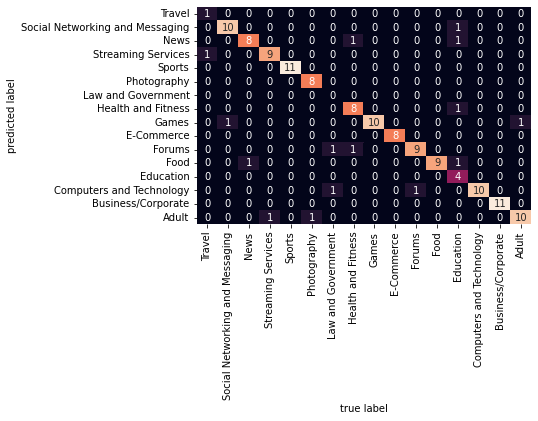

In [24]:
#create the confusion matrix visualization to evaluate machine learning model performance and accuracy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

confusion_matrix(y_test, model.predict(X_test))


sns.heatmap(confusion_matrix(y_test, model.predict(X_test)).T, square=False, annot=True, fmt='d', cbar=False
            ,xticklabels=dataset.Category.unique(),
            yticklabels=dataset.Category.unique()
           )
plt.xlabel('true label')
plt.ylabel('predicted label');

In [25]:
#Test the created model
import numpy as np
new_text = np.array(["She is very hot and sexy"])

new_vector = countvectorizer.transform(new_text)
print(le.inverse_transform(model.predict(new_vector)))

['Adult']


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  "X does not have valid feature names, but"


# Other Classification Algorithms
Evaluate the classification on other machine learning classification algorithms

In [26]:
#Random Forest Classifier ML Algorithm
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [27]:
#print the testing and training accuracy
prediction = rfc.predict(X_test)
print('The mode training accuracy:', round(accuracy_score(y_train, rfc.predict(X_train)),5))
print('The model Testing accuracy:', round(accuracy_score(y_test, prediction),5))

The mode training accuracy: 1.0
The model Testing accuracy: 0.80142


In [28]:
#train the Gaussian Naive Bayes Model
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [29]:
#print the testing and training accuracy of the Gaussian Naive Bayes Model
prediction = gnb.predict(X_test)
print('The mode training accuracy:', round(accuracy_score(y_train, gnb.predict(X_train)),5))
print('The model Testing accuracy:', round(accuracy_score(y_test, prediction),5))

The mode training accuracy: 0.99369
The model Testing accuracy: 0.61702


In [32]:
#train the Linear Support Vector Classifier ML model
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVC()

In [33]:
#print the testing and training accuracy of the Linear Support Vector Classifier
prediction = svc.predict(X_test)
print('The mode training accuracy:', round(accuracy_score(y_train, svc.predict(X_train)),5))
print('The model Testing accuracy:', round(accuracy_score(y_test, prediction),5))

The mode training accuracy: 1.0
The model Testing accuracy: 0.82979


In [37]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object and train the model
regressor = DecisionTreeRegressor() 
regressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [38]:
#print the testing and training accuracy of the Decision Tree Regressor Algorithm
prediction = regressor.predict(X_test)
print('The mode training accuracy:', round(accuracy_score(y_train, regressor.predict(X_train)),5))
print('The model Testing accuracy:', round(accuracy_score(y_test, prediction),5))

The mode training accuracy: 1.0
The model Testing accuracy: 0.5461


In [52]:
#train the K- Nearest Neighbor algorithm : https://www.datacamp.com/community/tutorials/k-nearest-neighbor-classification-scikit-learn
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=16)
neigh.fit(X_train, y_train)

KNeighborsClassifier(p=16)

In [ ]:
#print the testing and training accuracy of the K-Nearest Neighbor Classifier Algorithm
prediction = neigh.predict(X_test)
print('The mode training accuracy:', round(accuracy_score(y_train, neigh.predict(X_train)),5))
print('The model Testing accuracy:', round(accuracy_score(y_test, prediction),5))

In [46]:
#train a Logistic Regression model for the classification
from sklearn import linear_model
LRG = linear_model.LogisticRegression(random_state = 0,solver = 'liblinear', multi_class='auto')
LRG.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [47]:
#print the testing and training accuracy of the Logistic Regression model
prediction = LRG.predict(X_test)
print('The mode training accuracy:', round(accuracy_score(y_train, LRG.predict(X_train)),5))
print('The model Testing accuracy:', round(accuracy_score(y_test, prediction),5))

The mode training accuracy: 1.0
The model Testing accuracy: 0.89362


In [50]:
#cross validation based accuracy checking
from sklearn.model_selection import cross_val_score 

print(cross_val_score(KNeighborsClassifier(), X_train, y_train, cv=5, scoring="accuracy").mean)
print(cross_val_score(DecisionTreeRegressor() , X_train, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(linear_model.LogisticRegression(random_state = 0,solver = 'liblinear', multi_class='auto'), X_train, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(LinearSVC(), X_train, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(GaussianNB(), X_train, y_train, cv=5, scoring="accuracy"))
print(cross_val_score(MultinomialNB(), X_train, y_train, cv=5, scoring="accuracy"))

<built-in method mean of numpy.ndarray object at 0x7f71741d7cf0>
[0.5        0.5511811  0.51383399 0.50197628 0.43083004]
[0.89370079 0.87401575 0.91304348 0.86166008 0.88142292]


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.80314961 0.82283465 0.82608696 0.79841897 0.79051383]
[0.63779528 0.65354331 0.66798419 0.70750988 0.65217391]
[0.88976378 0.87795276 0.88142292 0.90118577 0.87351779]
